In [23]:
import math

import random
import numpy as np
import torch
import torchvision.utils
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.color import rgb2gray
from skimage.metrics import structural_similarity

In [2]:
def imsshow(imgs, titles=None, num_col=5, dpi=100, cmap=None, is_colorbar=False, is_ticks=False):
    '''
    assume imgs's shape is (Nslice, Nx, Ny)
    '''
    num_imgs = len(imgs)
    num_row = math.ceil(num_imgs / num_col)
    fig_width = num_col * 3
    if is_colorbar:
        fig_width += num_col * 1.5
    fig_height = num_row * 3
    fig = plt.figure(dpi=dpi, figsize=(fig_width, fig_height))
    for i in range(num_imgs):
        ax = plt.subplot(num_row, num_col, i + 1)
        im = ax.imshow(imgs[i], cmap=cmap)
        if titles:
            plt.title(titles[i])
        if is_colorbar:
            cax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0, 0.01, ax.get_position().height])
            plt.colorbar(im, cax=cax)
        if not is_ticks:
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()
    plt.close('all')

In [3]:
dataset = np.load('./cine.npz')['dataset']

In [4]:
dataset.shape

(200, 20, 192, 192)

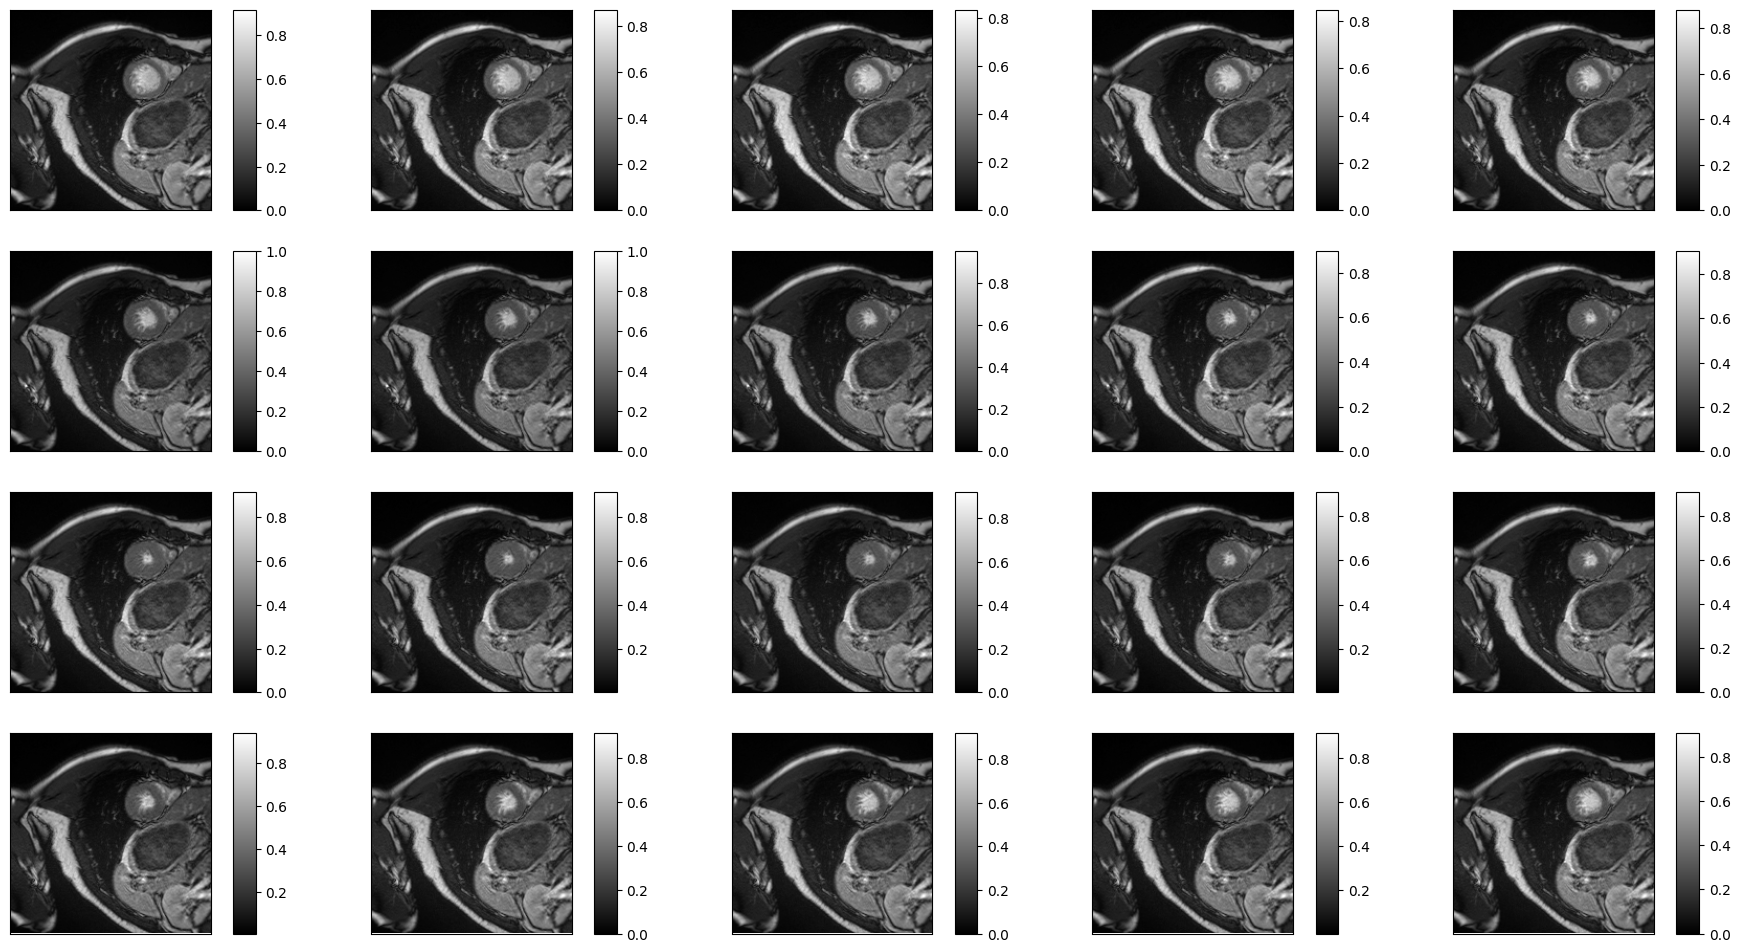

In [5]:
imsshow(dataset[1], num_col=5, cmap='gray', is_colorbar=True)

In [6]:
from data_process import get_aliased

In [11]:
dataset = get_aliased(dataset)

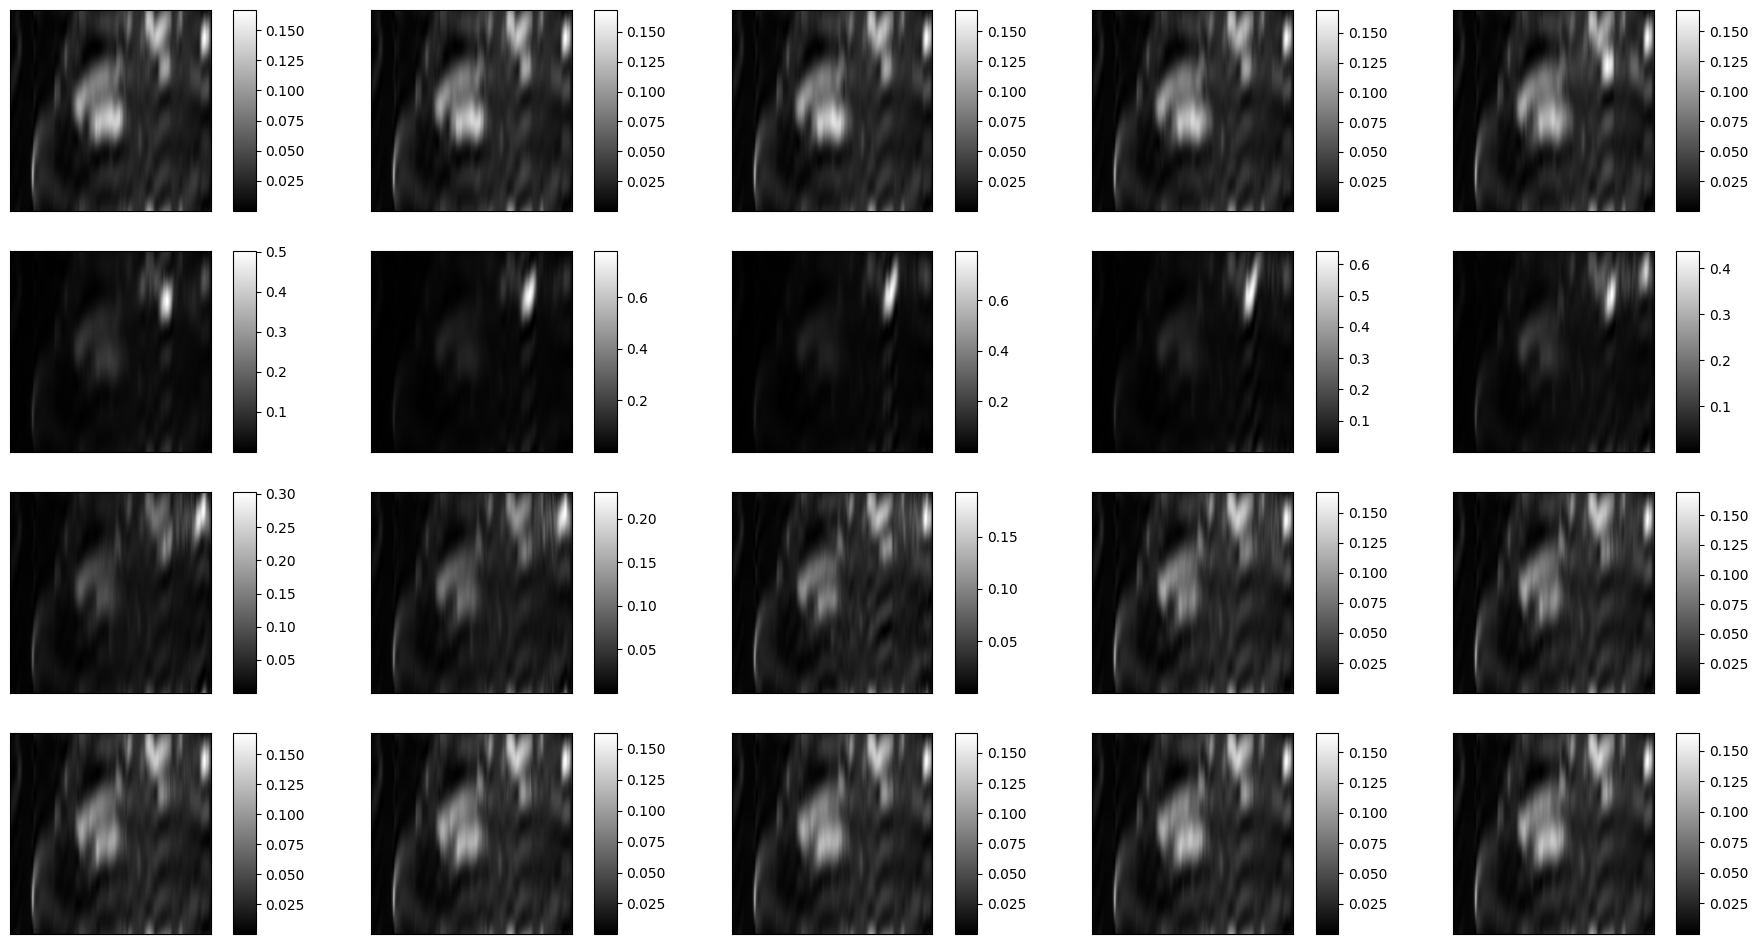

In [24]:
INDEX = random.randint(0, 199)
imsshow(dataset[INDEX], num_col=5, cmap='gray', is_colorbar=True)